<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Data Wrangling</h1>
<hr>



### Import libraries and load the dataset.


In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd


# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

In [3]:
# Load international online transactions data from CSV
df = pd.read_csv('project_files/int_online_tx.csv')

<span id="exploration"></span>
# Transaction-level exploration



<br>


In [4]:
# Dataframe dimensions
df.shape

(35116, 8)

In [5]:
# Data types of the columns
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
# First 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


In [7]:
df.Country.value_counts().index

Index(['Germany', 'France', 'Spain', 'Belgium', 'Switzerland', 'Portugal',
       'Norway', 'EIRE', 'Italy', 'Channel Islands', 'Finland', 'Cyprus',
       'Australia', 'Sweden', 'Unspecified', 'Austria', 'Denmark', 'Poland',
       'Japan', 'Israel', 'Hong Kong', 'Netherlands', 'Singapore', 'Iceland',
       'USA', 'Canada', 'Greece', 'Malta', 'United Arab Emirates',
       'European Community', 'RSA', 'Lebanon', 'Lithuania', 'Brazil',
       'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')

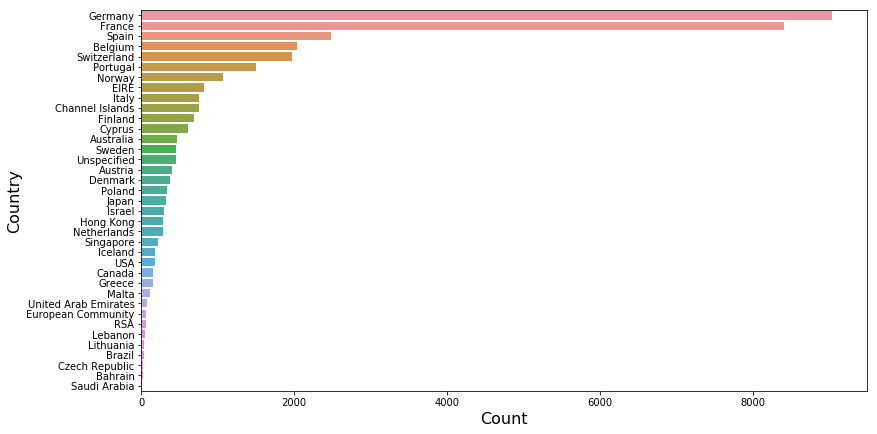

In [8]:
# Make figsize 6x7
plt.figure(figsize = (13,7))

# Bar plot by country
sns.countplot(y = 'Country', data = df, order = df.Country.value_counts().index)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("Country", fontsize = 16)
plt.show()

<span id="cleaning"></span>
# Transaction-level cleaning



<br>
**Display the number of missing observations for each feature.**

In [9]:
# Missing data by feature
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

**Drop observations with missing customer ID's.**

In [10]:
# Only keep transactions with CustomerID's
df.dropna(inplace = True)

In [11]:
# Convert customer ID's into integers
df.CustomerID = df.CustomerID.astype(int)

# Display first 5 CustomerID's in the transaction dataset
df.CustomerID.head()

0    12583
1    12583
2    12583
3    12583
4    12583
Name: CustomerID, dtype: int64

**Create a <code style="color:steelblue">'Sales'</code> interaction feature.**


In [12]:
# Create 'Sales' interaction feature
df['Sales'] = df.Quantity * df.UnitPrice

# Display first 5 Sales values in the transaction dataset
df.Sales.head()


0    90.0
1    90.0
2    45.0
3    10.2
4    15.6
Name: Sales, dtype: float64

In [13]:
# Save cleaned transaction-level data
df.to_csv('project_files/cleaned_transactions.csv', index = None)

<span id="customer-level"></span>
# Customer-level feature engineering



<br>
**First, we'll aggegrate invoice data by customer. We'll engineer 1 feature:**
* <code style="color:steelblue">'total_transactions'</code> - the total number of unique transactions for each customer.

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [15]:
# Aggegrate invoice data
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({ 'total_transactions' : 'nunique' })

# Display invoice data for first 5 customers
invoice_data.head()


/home/kshitiz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [16]:
# Aggregate product data
product_data = df.groupby('CustomerID').StockCode.agg({'total_products' : 'count', 
                                                      'total_unique_products' : 'nunique'})


# Display product data for first 5 customers
product_data.head()

/home/kshitiz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [17]:
# Roll up sales data

sales_data = df.groupby('CustomerID').Sales.agg({'total_sales' : 'sum',
'avg_product_value' : 'mean'})
# Display sales data for first 5 customers
sales_data.head()

/home/kshitiz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


<span id="intermediary-levels"></span>
# Intermediary levels



In [18]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = df.groupby(['CustomerID' , 'InvoiceNo']).Sales.agg( { 'cart_value' : 'sum' })


# Reset index
cart_data.reset_index(inplace=True)


# Display cart data for first 5 CARTS
cart_data.head()


/home/kshitiz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


In [19]:
# Aggregate cart data (at customer-level)
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({'avg_cart_value' : 'mean',
                                                               'min_cart_value' : 'min',
                                                               'max_cart_values' : 'max'})

# Display cart data for first 5 CUSTOMERS
agg_cart_data.head()

/home/kshitiz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,avg_cart_value,min_cart_value,max_cart_values
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


<span id="joining"></span>
# 5. Joining together the ABT



In [20]:
# Join together customer-level ABT
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_values
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


In [21]:
# Save analytical base table
customer_df.to_csv('project_files/analytical-base-table.csv')